# Pandas Homework

In [1]:
import pandas

In [2]:
data = pandas.read_csv('data/pythondevsurvey2017_raw_data.csv')
data['id'] = range(0, len(data))

## Kolik lidí celkem vyplnilo dotazník?

In [3]:
print(f'Celkem vyplnilo: {len(data.index)}')

Celkem vyplnilo: 9506


## Kolik z respondentů aktuálně používá Python v nějakém projektu?

In [4]:
pyt_curr = data.loc[:, 'Is Python the main language you use for your current projects?']

In [5]:
pythonists = data.loc[:, :][pyt_curr == 'Yes'] # All data where the answer is Yes

In [6]:
print(f'Aktualne pouziva Python: {len(pythonists)}')

Aktualne pouziva Python: 6417


## Kolik Pythonistů z Česka odpovědělo na dotazník? Kolik ze Slovenska?

### Česko

In [7]:
cntry = pythonists.loc[:, 'What country do you live in?']
print(f"Ceskych Pythonistu: {len(cntry[cntry == 'Czech Republic'])}")

Ceskych Pythonistu: 45


### Slovensko

In [8]:
print(f"Slovenskych Pythonistu: {len(cntry[cntry == 'Slovakia'])}")

Slovenskych Pythonistu: 17


## Kolik Pythonistů používá i staticky typované jazyky?

In [9]:
# Get DataFrame for the 1st language 4648
jva_col = pythonists.loc[:,'Java:What other language(s) do you use?']
jva = pythonists.loc[:, :][jva_col == 'Java']

static_langs =['C#', 'C/C++', 'Objective-C', 'Go', 'Scala', 'SQL', 'Kotlin', 'Swift', 'Rust', 'TypeScript']

# Iterate through all other languages
for l in static_langs:
    # Get dataframe of the current language
    l_col = pythonists.loc[:, f'{l}:What other language(s) do you use?']
    l_only = pythonists.loc[:, :][l_col == f'{l}']
    # Merge dataframes together
    jva = jva.merge(l_only, how='outer', left_on='id', right_on='id')
sl = jva
print(f'Pythoniste pouzivajici staticky typovane jazyky: {len(sl)}')


Pythoniste pouzivajici staticky typovane jazyky: 4648


## Kolik Pythonistů používá i ostatní dynamicky typované jazyky (tedy kromě Pythonu samotného)?

In [10]:
# Get DataFrame for the 1st language
js_col = pythonists.loc[:,'JavaScript:What other language(s) do you use?']
js = pythonists.loc[:, :][js_col == 'JavaScript']

dynamic_langs = ['PHP', 'Ruby', 'Bash / Shell', 'Visual Basic', 'R', 'Clojure', 'Perl', 'Groovy', 'CoffeeScript']

# Iterate through all other languages
for l in dynamic_langs:
    # Get dataframe of the current language
    l_col = pythonists.loc[:, f'{l}:What other language(s) do you use?']
    l_only = pythonists.loc[:, :][l_col == f'{l}']
    # Merge dataframes together
    js = js.merge(l_only, how='outer', left_on='id', right_on='id')
dl = js
print(f'Pythoniste pouzivajici dynamicky typovane jazyky: {len(dl)}')

Pythoniste pouzivajici dynamicky typovane jazyky: 4729


## Kolik Pythonistů používá jak staticky typované tak dynamicky typované jazyky?

In [11]:
# sl - Pythonists using statically typed languages
# dl - Pythonists using dynamically typed languages

# Get intersect of the dataframes
both = sl.merge(dl, left_on = 'id', right_on = 'id')
print(f'Pythoniste pouzivajici oba typy jazyku zaroven: {len(both)}')

Pythoniste pouzivajici oba typy jazyku zaroven: 3648


## Vykreslete graf, který pro každý další jazyk ukáže procento Pythonistů, kteří:
* pracují pouze na jednom projektu,
* pracují na jednom hlavním a několika vedlejších projektech,
* pracují na více projektech.

/home/vitek/SKOLA/MI-PYT/ukol3/__venv__/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/vitek/SKOLA/MI-PYT/ukol3/__venv__/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/vitek/SKOLA/MI-PYT/ukol3/__venv__/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


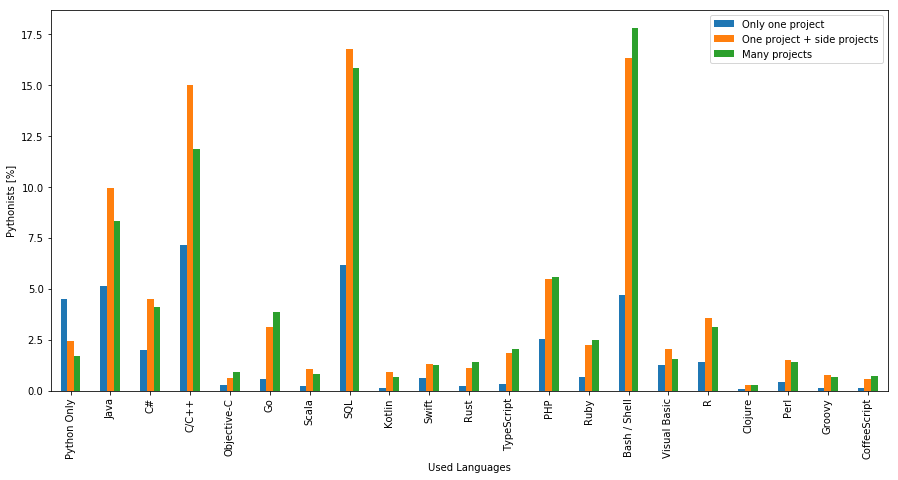

In [13]:
import matplotlib
%matplotlib inline

# For some reason, proj_info = data.loc[:, "Do you regularly work on multiple projects at the same time?"]
# does not work:
# KeyError: 'the label [Do you regularly work on multiple projects at the same time?] is not in the [columns]'
x = ''
for i in pythonists.columns:
    if 'regularly' in i:
        x = i
proj_info = pythonists.loc[:, x]

languages = ['None', 'Java', 'C#', 'C/C++', 'Objective-C', 'Go', 'Scala', 'SQL', 'Kotlin', 'Swift', 'Rust', 'TypeScript', 
            'PHP', 'Ruby', 'Bash / Shell', 'Visual Basic', 'R', 'Clojure', 'Perl', 'Groovy', 'CoffeeScript']

percents = {} # lang: [one, side, more]
for l in languages:
    # Get language dataframe
    ldf_nan = pythonists.loc[:, f'{l}:What other language(s) do you use?']
    ldf = pythonists.loc[:, :][ldf_nan == f'{l}']
    # No,  I only work on one project 329 128 460
    one_proj = ldf.loc[:, :][proj_info == 'No,  I only work on one project']
    l_one_proj = len(one_proj)
    # Yes, I work on many different projects
    more_proj = ldf.loc[:, :][proj_info == 'Yes, I work on many different projects']
    l_more_proj = len(more_proj)
    # Yes, I work on one main and several side projects
    one_plus_side = ldf.loc[:][proj_info == 'Yes, I work on one main and several side projects']
    l_one_plus_side = len(one_plus_side)
    
    one_perc = len(pythonists) / 100
    percents[f'{l}'] = [l_one_proj/one_perc, l_one_plus_side/one_perc, l_more_proj/one_perc]
    
to_plot = pandas.DataFrame.from_dict(percents)

xt = ['Python Only', 'Java', 'C#', 'C/C++', 'Objective-C', 'Go', 'Scala', 'SQL', 'Kotlin', 'Swift', 'Rust', 'TypeScript', 
            'PHP', 'Ruby', 'Bash / Shell', 'Visual Basic', 'R', 'Clojure', 'Perl', 'Groovy', 'CoffeeScript']
plt = to_plot.T.plot.bar(figsize = (15,7), legend = True)
plt.set_xticklabels(xt)
plt.set_xlabel("Used Languages")
plt.legend(["Only one project", "One project + side projects", "Many projects"])
y = plt.set_ylabel("Pythonists [%]")